# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 14-02: One-Hot Encoding. Linear Model Diagnostics. 

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - science
import numpy as np

# - data
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng()

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

## 3. One-Hot (Dummy) Encoding

### Target: predict weight from all the predictors (both categorical and continuous)

In [2]:
# - loading the dataset
# - Kaggle: https://www.kaggle.com/datasets/aungpyaeap/fish-market
# - place it in your _data/ directory
fish_data = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


### Target: predict weight from all the predictors (both categorical and continuous)

In [3]:
model_frame = fish_data.copy()

In [4]:
# - number of data entries grouped by species class
model_frame['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [5]:
predictors = model_frame.columns.drop('Weight')
predictors

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In one hot encoding categorical predictor 'split' into $C$ binary vectors, where $C$ is the number of categories. Each coordinate of this vector becomes a new "dummy" feature, corresponding to one category of a categorical variable. We won't write explicit mathematical formula of the model in this case, as it would require us going into some Linear Algebra and matrix-vector notation. 

In [6]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'Weight ~ ' + formula

formula

'Weight ~ Species + Length1 + Length2 + Length3 + Height + Width'

In [7]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           6.85e-82
Time:                        11:22:13   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -918.3321    127.083     -7.226      0.000   -1169.478    -667.186
Species[T.Parkki]      164.7227     75.699      2.176      0.031      15.123     314.322
Species[T.Perch]       137.9489    120.314      1.147      0.253     -99.819     375.717
Species[T.Pike]       -208.4294    135.306     -1.540      0.126    -475.826      58.968
Species[T.Roach]       103.0400     91.308      1.128      0.261     -77.407     283.487
Species[T.Smelt]       446.0733    119.430      3.735      0.000     210.051     682.095
Species[T.Whitefish]    93.8742     96.658      0.971      0.333     -97.145     284.893
Length1                -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                 79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                 32.5354     29.300      1.110      0.269     -25.369      90.439
Height                   5.2510     13.056      0.402      0.688     -20.551      31.053
Width                   -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Referrence Category 

One-hot/dummy encoding can create a high collinearity between its dummy variables - this is called "dummy variable trap". To resolve this, we chose one category as a referrence and throw its corresponding dummy variable out of the model. Therefore, we have $C-1$ dummy variables, where $C$ is the number of categories.

In [8]:
# --- Composing the fomula of the model

# - right side of the formula; continuous predictors
num_predictors = predictors.drop('Species')
formula = ' + '.join(num_predictors)

# - right side of the formula; categorical predictor, one-hot encoded using the "Perch" category as the reference
formula = 'C(Species, Treatment(reference="Perch")) + ' + formula

# - left side of the formula
formula = 'Weight ~ ' + formula
formula

'Weight ~ C(Species, Treatment(reference="Perch")) + Length1 + Length2 + Length3 + Height + Width'

In [9]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           6.85e-82
Time:                        11:22:14   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              -780.3832     39.541    -19.736      0.000    -858.526    -702.240
C(Species, Treatment(reference="Perch"))[T.Bream]      -137.9489    120.314     -1.147      0.253    -375.717      99.819
C(Species, Treatment(reference="Perch"))[T.Parkki]       26.7738     65.378      0.410      0.683    -102.429     155.977
C(Species, Treatment(reference="Perch"))[T.Pike]       -346.3783     74.804     -4.630      0.000    -494.209    -198.548
C(Species, Treatment(reference="Perch"))[T.Roach]       -34.9090     47.802     -0.730      0.466    -129.377      59.559
C(Species, Treatment(reference="Perch"))[T.Smelt]       308.1244     42.941      7.176      0.000     223.263     392.985
C(Species, Treatment(reference="Perch"))[T.Whitefish]   -44.0747     52.938     -0.833      0.406    -148.693      60.544
Length1                                                 -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                                                  79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                                                  32.5354     29.300      1.110      0.269     -25.369      90.439
Height                                                    5.2510     13.056      0.402      0.688     -20.551      31.053
Width                                                    -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# - predicting the values
model_frame['Predicted Weight'] = linear_model.predict()
model_frame

,Species,Weight,Length1,Length2,Length3,Height,Width,Predicted Weight
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,282.291371
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,333.884974
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,353.901528
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,440.954349
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,439.309943
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,25.130994
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,30.149127
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,54.925142
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,118.706961


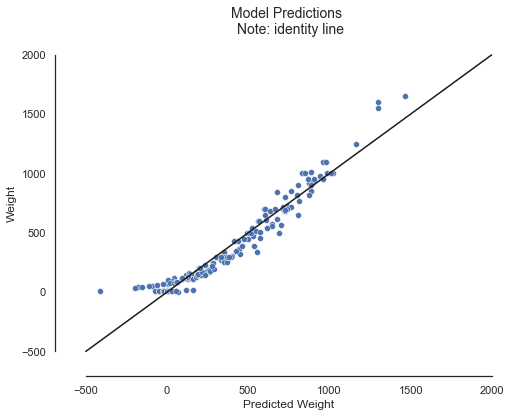

In [11]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Weight')
sns.lineplot(x=np.arange(-500, 2000), y=np.arange(-500, 2000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);

### One-Hot Encoding in scikit-learn

In [12]:
# - import One-Hot Encoder from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [13]:
model_frame = fish_data.copy()

In [14]:
### --- One-Hot Encoding the categories

# - feature matrix
X0 = model_frame.drop(columns='Weight')

# - extracting the categorical variable
cat_var = X0['Species'].values.reshape(-1, 1)

# - defining the One Hot Encoder; 'drop' argument defines which class to drop and use as a referrence
# - we need to specify 'sparse=False' in order for the encoder to give as a dense binary matrix
enc = OneHotEncoder(drop=['Perch'], sparse=False)

# - transforming categorical variable values into corresponding binary vectors
dummy = enc.fit_transform(cat_var)
dummy[:10]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [15]:
### --- Fitting the linear model to the numerical data

# - independent variables

# - numerical variables
X0 = X0.drop(columns='Species').values

# - all the variables
X = np.concatenate((dummy, X0), axis=-1)

# - the dependent variable
y = model_frame['Weight'].values.reshape(-1, 1)


lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [16]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

(array([[-137.94890963,   26.77375104, -346.37826625,  -34.90895507,
          308.12440784,  -44.07474158,  -80.30295196,   79.88863137,
           32.53538142,    5.25098766,   -0.51543798]]),
 array([-780.38323057]))

In [17]:
# - calculating R^2 
lin_reg.score(X, y)

0.9360849020585845

In [18]:
# - predicting the weight using the model
y_pred = lin_reg.predict(X)
y_pred[:10]

array([[282.29137079],
       [333.88497422],
       [353.90152808],
       [440.95434943],
       [439.30994261],
       [500.10509956],
       [496.44739798],
       [464.81628591],
       [475.00009312],
       [495.54295721]])

## 4. Linear Model Diagnostics

The following are the key assumptions of linear regression:

**Linearity**: There should be a linear relationship between the dependent variable and the independent variable(s). This means that the relationship between the variables can be approximated by a straight line.

**Independence**: The observations should be independent of each other. That is, the value of one observation should not be influenced by the value of another observation.

**Homoscedasticity**: The variance of the errors (residuals) should be constant across all levels of the independent variable(s). This means that the spread of the residuals should be the same across the range of values for the independent variable(s).

**Normality**: The residuals should be normally distributed. This means that the distribution of the residuals should follow a bell-shaped curve, with most of the residuals near zero and fewer residuals further from zero.

**No multicollinearity**: There should be no perfect linear relationship among the independent variables. This means that the independent variables should not be highly correlated with each other.

**No influential outliers**: There should be no influential outliers, which are data points that have a large effect on the regression coefficients.

Violation of these assumptions can lead to biased or inefficient estimates of the regression coefficients and incorrect statistical inferences. Therefore, it is important to assess these assumptions before interpreting the results of a linear regression model. 

### Further Reading

- [Brandon Foltz, Statistics PL15 - Multiple Linear Regression Playlist](https://www.youtube.com/playlist?list=PLIeGtxpvyG-IqjoU8IiF0Yu1WtxNq_4z-)


***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>